# More Supervised Learning algorithms 

### By **[NimbleBox](https://www.nimblebox.ai/)**

[<img src="./assets/nbx.jpeg" alt="NimbleBox logo" width=600/>](https://www.nimblebox.ai/)

This notebook contains parts from [StatQuest](https://www.youtube.com/channel/UCtYLUTtgS3k1Fg4y5tAhLbw).

## What we are going to learn
 
- Decision Trees
- Naive Bayes
 
Let's talk about Naive Bayes on why it's called that. Bayes comes from the fact that Naive Bayes uses Bayesian probability to predict the output or formally called target in Machine Learning and we are going to look at why it's called naive further in the notebook.Naive Bayes can be used for classification problems.
 
The name for Decision Trees comes from the type of structure they have and yes it's like a tree but upside down where there is a **root node** or the node from where the tree starts, on each a decision like yes or no or a comparison is made and that's where the word decision comes from. Decision Trees can be used to solve both classification and regression problems.

## Decision Trees
 
First let's look at the structure of decision trees and clear some terminologies that will help us get a better understanding of what they exactly are. 
 
[<img src="./assets/decision_tree_1.png" width=600>](https://www.nimblebox.ai)
 
So as we can see that the node at the top is called the Root Node or just the Root, arrows can diverge from a root but do not come in to a root because that is the starting point of a decision tree.
Next we see that there are Internal Nodes whose arrows diverge into other nodes and also have incoming arrows which can either go to more internal Nodes or terminate at a Leaf Node which can accept arrows but do nto further point to other nodes and one of the leaf nodes but do not further point to any other node and is the final answer the decision tree points to after traversing from top to bottom.
 
Okay so well versed with the basic terminology let's see how a decision tree is built, for this example we are going to take data where we predict if a person has heart disease by looking at the two features which are chest pain and good blood circulation. We have only shown 4 examples to understand it better.
 
<img src="./assets/decision_tree_data.png" width=400>
 
Let's decide which feature from chest pain or good blood circulation is going to be the Root node, We do that by taking the individual feature and checking which feature can better alone predict if the person has heart disease.
 
Let's look at chest pain first and construct a diagram like this.
 
<img src="./assets/decision_tree_chest.png" width=400>
 
We see from the diagram that there are 105 people who had chest pain and also have heart disease and 39 people who had chest pain but not heart disease and on the other hand we see that there are 34 people who did not have a chest pain but still have heart disease and 125 people who did not have a chest pain and do not have a heart disease. 
 
Let's construct a similar diagram for Good blood circulation
 
<img src="./assets/decision_tree_blood.png" width=400>
 
To compare which of the two features should be the root node we calculate the **Gini Impurity** which is calculated for each leaf note separately and then a weighted sum of them is used to decide which feature to use. Let's see how.
 
$$ Gini Impurity = 1 - (probability of "yes")^2 - (probability of "No")^2 $$
 
let's calculate it for the leaf where people had chest pain or where chest pain is True.
 
$$ Gini Impurity(true) = 1 - (105/(105 + 39))^2 - (39/(105 + 39))^2 = 0.395 $$
 
Now for the other leaf.
 
$$ Gini Impurity(false) = 1 - (34/(34 + 125))^2 - (125/(34 + 125))^2 = 0.336 $$
 
Now we will calculate the total gini impurity for chest pain.
 
$$ Gini Impurity(chest pain) = (144/(144 + 159)) * Gini Impurity(true) + (159/(144 + 159)) * Gini Impurity(false) = 0.364 $$
 
And similarly calculating the Gini Impurity for Good blood circulation we get.
 
$$ Gini Impurity(Good blood circulation) = 0.360 $$
 
So as we can see that gini impurity for good blood circulation is low we are going to make it the root node and chest pain as the parent node, When having multiple features this procedure is repeated for every feature until we get to a leaf node and see that the gini impurity of that leaf node is less without dividing it further with the feature, And so our final tree ends up looking something like this.
 
<img src="./assets/decision_tree_ex.png" width=600>
 
### Implementation 
 
For this we will be using the library SkLearn and the iris dataset. 


In [12]:
# Importing the dataset and tree 
from sklearn.datasets import load_iris
from sklearn import tree

# Assigining the dataset to variables X, y
X, y = load_iris(return_X_y=True)

# Creating a Decision tree object names as clf with gini criterion
clf = tree.DecisionTreeClassifier(criterion="gini")

# Training the Decision tree in a similar way as described above.
clf = clf.fit(X, y)

We can plot the Tree structure by doing this

[Text(167.4, 199.32, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.5230

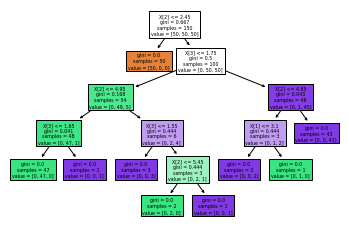

In [13]:
tree.plot_tree(clf, filled=True)

## Naive Bayes
 
Let's see what naive Bayes is but before we start it requires that you know what probabilities are and what independent probabilities mean, Suppose there are two events and you find their probabilities, For Naive Bayes we assume that those events are independent what independent probability means is that the probability of one event doesn't affects the probability of the other. 
 
Armed with this let's see how Naive Bayes actually works and for this we are going to take an example of classifying spam or non spam mails where we have 12 emails of which 8 are non-spam and 4 are spam.
 
<br>
 
<figure>
<img src="./assets/spam_filter.jpg" width=600>
<figcaption align=center>Image from <a href="https://blog.comodo.com/email-security/anti-spam-filtering-techniques/">Comodo blog</a> </figcaption>
</figure>
 
Our Naive Bayes classifier is going to work as the Email filter which will tell us which image is spam and which one is not based on the words the mail contains and I will let you know why it's called Naive. 
 
>A hint: it's related to the word order. 
 
to make this example easy we are going to consider only four words in the mails which are **Dear**, **Friend**, **Lunch** and **Money**
 
<img src="./assets/not_spam_word_count.png" width=600>
 
The above picture that you see is a histogram of the words that we are considering in the non-spam or the friendly mails, The blue boxes are the actual number of words that occur in the friendly mails and the black box is an extra **1** that we added to each of our words whose purpose will be explained later.
 
Let's calculate the probabilty of seeing each word in the friendly mail
 
$$ p(Dear|Friendly) = 9 / (17 + 4) = 0.43 $$
 
$$ p(Friend|Friendly) = 6 / (17 + 4) = 0.29 $$
 
$$ p(Lunch|Friendly) = 4 / (17 + 4) = 0.19 $$
 
$$ p(Money|Friendly) = 2 / (17 + 4) = 0.10 $$
 
And now we will calculate the initial probability of a mail being spam or not without considering the words, we calculate this probability from the training data, We will calculate the probability of a mail being friendly.
 
$$ p(Friendly|Email) = 8 / (8 + 4) = 0.67 $$
 
As we know that our training data consists of 8 friendly mails and 4 spam mails.
 
Now let's repeat the whole process for the spam mails, first we will calculate the probability of the word being in the spam mail and then we will calculate the initial probability that the mail is spam.
 
<br>
 
<img src="./assets/spam_word_count.png" width=600>
 
</br>
 
$$ p(Dear|Spam) = 3 / (17 + 4) = 0.27 $$
 
$$ p(Friend|Spam) = 2 / (17 + 4) = 0.18 $$
 
$$ p(Lunch|Spam) = 1 / (17 + 4) = 0.09 $$
 
$$ p(Money|Spam) = 5 / (17 + 4) = 0.45 $$
 
$$ p(Spam|Email) = 4 / (8 + 4) = 0.33 $$
 
Let's get to classifying now: 
 
Suppose you received a mail with the following contents: Lunch Money Money Money Money
 
Let's calculate the probability of this mail being friendly first.
 
$$ p(Friendly|Email) * p(Lunch|Friendly) * p(Money|Friendly)^4 = 0.00001  $$
 
And then the probability of it being spam.
 
$$ p(Spam|Email) * p(Lunch|Spam) * p(Money|Spam)^4 = 0.00122  $$
 
As we can see that this mail received a higher probability of being spam we will classify this mail as spam.
 
Now let's talk about why we added those black boxes or a extra count in the words as you can see while calculating the probabilities for the word Lunch being in spam it only had a single count that was because we added one, what if we didn't added that one the probability would be zero and you can easily see why the above mail would be classified as friendly because anything multiplied with 0 would have resulted in a probability of zero even if the mail contained the word Money four times.
 
And finally the moment when we talk about why it is called **Naive** Bayes, for this let's assume you received the above message but just the word order was a bit different: Money Money Lunch Money Money.
 
Now this mail could be from a friend that wants money for lunch, but Naive Bayes ignores all the word order in the sentence and the probability of this message is also going to be the same as the message which stated: Lunch Money Money Money Money.
 
And therefore this message will also end up in the spam folder instead of being in your inbox. 
 
Now all done with how Naive Bayes works let's implement it.
 
### Implementation

We will be using a tennis dataset. Below we have a Naive Bayes implementation which you can interact with, check [this](https://github.com/gr8Adakron/naive-bayes-using-python) out for the awesome work.

In [6]:
import pandas as pd
class_value={}
coloumn={}
data=[]
sample_data={}
result={}
global diff_values
diff_values=['empty']

def return_different_class_value(value):
    found=0
    for x in class_value:
        if(x==value):
            found=1
    if(found==0):
        class_value[value]=1
    else:
        class_value[value]+=1
        
def find_diff_value(values):
    already=0
    for index in diff_values:
        if(index==values):
            already=1
    if(already==0):
        diff_values.append(values)
        
def get_sample_data(prediction_value):
    for key in coloumn:
        attribute_no=1
        if(key!=prediction_value):
            for i in range(0,end):
                find_diff_value(data[i][coloumn[key]])
            del diff_values[0]
            for fields in diff_values:
                print('%d. %s'%(attribute_no,fields))
                attribute_no+=1
            what_data=int(input(' >> Select the sample data, for coloumn `` %s ``,(Enter no) : '%(coloumn[key])))
            sample_data[coloumn[key]]=diff_values[what_data-1]
            del diff_values[:]
            diff_values.append('empty')
            print("\n")
            
             
def choose_value():
    global to_find
    to_find=int(input(' >> Choose the coloumn to predict, (Only Enter, the number besides your choice):'))
    print(' \n >> Predicting Coloumn : %s  '%(coloumn[to_find]))
    global end
    end=len(data)
    for i in range(0,end):
        return_different_class_value(data[i][coloumn[to_find]])
    print("\n=============== INSERT SAMPLE DATA =================")
    get_sample_data(to_find)
    #del diff_value[0]

def get_index(value):
    for c in coloumn:
        if(value==coloumn[c]):
            return c
        
def find_probability(sample,classes):
    index=get_index(sample)
    k=0
    for i in range(0,end):
        if(sample_data[sample]==data[i][coloumn[index]] and classes==data[i][coloumn[to_find]]):
            k+=1
    return k

def find_max(d):
     v=list(d.values())
     k=list(d.keys())
     return k[v.index(max(v))]

def get_laplacian_estimation(flag):
    calculation=[]
    for values in prob_dict:
        for classes in class_value:
            if(flag==True):
                lap_value=prob_dict[values][classes]+1
                lap_div=class_value[classes]+1
            else:
                lap_value=prob_dict[values][classes]
                lap_div=class_value[classes]
            probability=(lap_value/lap_div)
            prob_dict[values][classes]=probability
    for classes in class_value:
        del calculation[:]
        total=0
        for values in prob_dict:
            calculation.append(prob_dict[values][classes])
        for i in range(0,len(calculation)):
            if(i==1):
                total=calculation[i]*calculation[i-1]
            if(i>1):
                total=calculation[i]*total
        if(flag==True):
            lap_total=end+1
            lap_class=class_value[classes]+1
        else:
            lap_total=end
            lap_class=class_value[classes]
        total=total*(lap_class/lap_total)
        result[classes]=total
    answer=find_max(result)
    return answer

def print_dict_as_table(dict):
    df = pd.DataFrame(dict).T
    df.fillna(0, inplace=True)
    print(df)

def main():
    import csv
    with open('./assets/tennis.csv') as csvfile:
        reader = csv.DictReader(csvfile)
        sr_no=1
        for row in reader:
            #print('%s'%(row))
            data.append(row)
            sr_no+=1
    print('\n==============  SAMPLE DATA GIVEN =============\n')
    print(pd.DataFrame(data,index=list(range(1,len(data)+1))))
    print('\n==============  SELECT A COLOUMN TO PREDICT USING NAIVE BIAS  ============\n')
    no_2=1
    for key in data[0]:
        print('%d. %s'%(no_2,key))
        coloumn[no_2]=key
        no_2+=1
    choose_value()
    global prob_dict
    laplacian=False
    prob_dict={}
    for samples in sample_data:
        temp_dict={}
        for classes in class_value:
            prob=find_probability(samples,classes)
            temp_dict[classes]=prob
        prob_dict[samples]=temp_dict
    print('\n=========== SAMPLE DATA ===========\n')
    for s in sample_data:
        print(' >> %s :  %s'%(s,sample_data[s]))
    print("\n=========== DIFFERENT CLASS VALUES IN PREDICTION COLOUMN =============\n")
    for c in class_value:
        print(' >> %s :  %s'%(c,class_value[c]))
    print('\n=========== VALUES MATCHED FOR SAMPLE DATA ============\n')
    print_dict_as_table(prob_dict)
    for prob in prob_dict:
        for classes in class_value:
            if(prob_dict[prob][classes]== 0):
                laplacian=True
    print("\n===========  HYPOTHESIS FOR EACH SAMPLE DATA =============\n")
    if(laplacian==True):
        print('>> Applying Laplacian Smoothing.(Laplacian Smoothing = True)\n')
        lap=True
        predicted_value=get_laplacian_estimation(lap)
    else:
        print(' >> Laplacian Smoothing not found.')
        lap=False
        predicted_value=get_laplacian_estimation(lap)
    print_dict_as_table(prob_dict)
    return predicted_value
    
if __name__=="__main__":
    answer=main()
    print('\n============ FINAL PROBABILITY FOR EACH PREDICTION ==============\n')
    for i in result:
        print(' >> %s  : %s '%(i,result[i]))
    print('\n >>Prediction using naive bias is, %s = %s'%(coloumn[to_find],answer))


==============  SAMPLE DATA GIVEN =============

     Outlook Temp. Humidity   Windy Play
1      sunny   hot     high  false    no
2      sunny   hot     high   true    no
3   overcast   hot     high  false   yes
4      rainy  mild     high  false   yes
5      rainy  cool   normal  false   yes
6      rainy  cool   normal   true    no
7   overcast  cool   normal   true   yes
8      sunny  mild     high  false    no
9      sunny  cool   normal  false   yes
10     rainy  mild   normal  false   yes
11     sunny  mild   normal   true   yes
12  overcast  mild     high   true   yes
13  overcast   hot   normal  false   yes
14     rainy  mild     high   true    no

==============  SELECT A COLOUMN TO PREDICT USING NAIVE BIAS  ============

1. Outlook
2. Temp.
3. Humidity
4. Windy
5. Play
 >> Choose the coloumn to predict, (Only Enter, the number besides your choice):5
 
 >> Predicting Coloumn : Play  

=============== INSERT SAMPLE DATA =================
1. sunny
2. overcast
3. rainy
 >> Selec